#  <font color='red'>I. Import des librairies </font>

In [65]:
import pandas as pd
import joblib
import numpy as np
from sklearn.datasets import load_boston
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.stats import iqr
from statistics import *
import seaborn as sns
from fonction import *
#from lime.lime_tabular import LimeTabularExplainer
from sklearn.metrics import confusion_matrix
#import imblearn
#from imblearn.under_sampling import RandomUnderSampler 
from sklearn import preprocessing 
import joblib
import shap

#  <font color='red'>II. Import des données </font>

In [66]:
data_app = pd.read_csv(r"all_data8.csv", sep=";")
data_test = pd.read_csv(r"all_data9.csv", sep=";")

ValueError: Dimensions of labels and X must be compatible

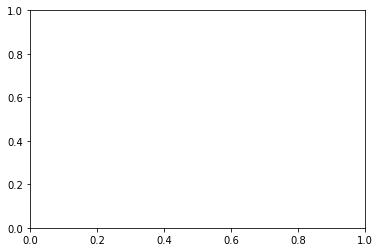

In [56]:
plt.boxplot(data_app["acc_x"], labels=data_app["defaut"])
palette = ['r', 'g']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.show()

In [67]:
data_app = data_app[data_app['angle']==90]
data_test = data_test[data_test['angle']==90]
data_app = data_app[(data_app['obs']==0) | (data_app['obs']==0.5)]
data_test = data_test[(data_test['obs']==0) | (data_test['obs']==0.5) ]
std_scale = preprocessing.StandardScaler().fit(data_app[['acc_x','acc_y']])
#data_app[['acc_x','acc_y']] = std_scale.transform(data_app[['acc_x','acc_y']])

In [35]:
def data_bruite(data):
    data_final=df1 = pd.DataFrame(columns=data.columns)
    m=0
    for k in set(data['angle']):
        for j in set(data['obs']):
            data1=data[(data['angle']==k) & (data['obs']==j)]
   
            i=data1.index.min()
            while i < data1.index.max()-200:
                data11=data1.loc[i:i+200]
                data11["numero ouverture"]=m
                m=m+1
                i=i+200
                data_final=pd.concat([data_final,data11], ignore_index=True)
    return data_final

In [87]:
data_test1= data_bruite(data_test)

/var/folders/xg/n2vsbh6136v6pk93dgn1xkcc0000gn/T/ipykernel_11882/2582845091.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
data_test1.shape

(75174, 14)

In [89]:
#data_test
data_test1.to_csv('data_test_brute.csv', sep=';', index=False)

In [68]:
data_app[['acc_x','acc_y', 'defaut']].to_csv('data8.csv', sep=';', index=False)

In [95]:
data_ = pd.read_csv(r"data_test_brute.csv", sep=";")
data_.shape

(75174, 14)

In [98]:
data_.columns

Index(['time', 'rpm', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z',
       'temp', 'obs', 'angle', 'size', 'defaut', 'numero ouverture'],
      dtype='object')

In [60]:
#data_[['acc_x','acc_y']].reset_index()

,index,acc_x,acc_y
0,0,0.0415,0.0005
1,1,0.0381,0.0005
2,2,0.0429,0.0024
3,3,0.0425,0.0039
4,4,0.0395,0.0068
...,...,...,...
9643,9643,0.0229,0.0102
9644,9644,0.0185,0.0078
9645,9645,0.0185,0.0093
9646,9646,0.0205,0.0044


In [58]:
a=extrac_features(data_[['acc_x','acc_y']].reset_index())

In [59]:
a.columns

Index(['meanindex', 'stdindex', 'madindex', 'minindex', 'varindex', 'iqrindex',
       'ecartindex', 'meanacc_x', 'stdacc_x', 'madacc_x', 'minacc_x',
       'varacc_x', 'iqracc_x', 'ecartacc_x', 'meanacc_y', 'stdacc_y',
       'madacc_y', 'minacc_y', 'varacc_y', 'iqracc_y', 'ecartacc_y'],
      dtype='object')

In [62]:
"""import plotly.express as px 
import numpy 

fig = px.pie(values=targets.values, names=targets.index) 
fig.show()"""

'import plotly.express as px \nimport numpy \n\nfig = px.pie(values=targets.values, names=targets.index) \nfig.show()'

In [54]:
filename = 'strealit_scaler.sav'
joblib.dump(std_scale, filename)


['strealit_scaler.sav']

In [40]:
scaler1 = joblib.load('strealit_scaler.sav') 
data_test[['rpm','acc_x','acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']] = scaler1.transform(data_test[['rpm','acc_x','acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']])
#data_app[['rpm','acc_x','acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']] = scaler1.transform(data_app[['rpm','acc_x','acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']])

In [21]:
"""import plotly.express as px
import plotly.graph_objects as go

df = px.data.wind()
fig = px.scatter(df, y="frequency")

#fig.update_layout(xaxis=dict(domain=[0, 0.5]), yaxis=dict(domain=[0.25, 0.75]))
fig.add_annotation(x=123.5, y=0.95,
            text="Text annotation without arrow",
            showarrow=True,
            arrowhead=1)
fig.update_layout(showlegend=False)
fig.show()"""

'import plotly.express as px\nimport plotly.graph_objects as go\n\ndf = px.data.wind()\nfig = px.scatter(df, y="frequency")\n\n#fig.update_layout(xaxis=dict(domain=[0, 0.5]), yaxis=dict(domain=[0.25, 0.75]))\nfig.add_annotation(x=123.5, y=0.95,\n            text="Text annotation without arrow",\n            showarrow=True,\n            arrowhead=1)\nfig.update_layout(showlegend=False)\nfig.show()'

#  <font color='red'>III. extract features </font>

In [41]:
def feat(data):
    data_final=[]
    for i in set(data['angle']):
        for j in set(data['obs']):
            data1=data[(data['angle']==i) & (data['obs']==j)]
            data2i=extrac_features(data1[['acc_x','acc_y']])
            data2i["defaut"]=data1["defaut"].tolist()[0]
            #data2i["numero ouverture"]=data1["numero ouverture"].tolist()[0]
            data_final.append(data2i)
    data22=pd.concat(data_final, ignore_index=True)
    return data22

In [42]:
data_app=feat(data_app)
#data_=extrac_features(data_test[['acc_x','acc_y']])
data_test=feat(data_test)
#data4=feat(data4)

In [82]:
data_test.shape

(374, 15)

In [70]:
#data_.columns

Index(['meanacc_x', 'stdacc_x', 'madacc_x', 'minacc_x', 'varacc_x', 'iqracc_x',
       'ecartacc_x', 'meanacc_y', 'stdacc_y', 'madacc_y', 'minacc_y',
       'varacc_y', 'iqracc_y', 'ecartacc_y'],
      dtype='object')

In [85]:
#data_test.loc[data_test.index[1:204]].reset_index()

In [86]:
#data_

In [87]:
#data_test.loc[data_test.index[1:204]]

In [88]:
#data_

In [89]:
#set(data_test["obs"])

In [13]:
def boxplot(data, data1,temp):
    
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1,2,figsize=(20,9))
    ax = sns.boxplot(x="defaut", y=temp, data=data, ax=axes[0])
    ax = sns.boxplot(x="defaut", y=temp, data=data1, ax=axes[1])
    #plt.savefig("Boxplot.png")
    plt.show()

In [43]:
X1= data_app.drop(labels='defaut', axis=1)
Y1= data_app['defaut']
X2= data_test.drop(labels='defaut', axis=1)
Y2= data_test['defaut']
"""X3= data3.drop(labels='defaut', axis=1)
Y3= data3['defaut']
X4= data4.drop(labels='defaut', axis=1)
Y4= data4['defaut']"""

"X3= data3.drop(labels='defaut', axis=1)\nY3= data3['defaut']\nX4= data4.drop(labels='defaut', axis=1)\nY4= data4['defaut']"

In [44]:
from umap import UMAP
import plotly.express as px
from sklearn import preprocessing 
#std_scale = preprocessing.StandardScaler().fit(X2)
#X2 = std_scale.transform(X2)

umap_2d = UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(X1)

fig_2d = px.scatter(
    pd.DataFrame(proj_2d), x=0, y=1,
    color=Y1, labels={'color': 'label'}
)


fig_2d.show()

In [45]:
X22=pd.DataFrame(proj_2d)
X22['lable']=Y1
X22.to_csv('streamlit_app.csv', sep=';', index=False)

In [46]:
loaded_reducer = joblib.load('stramlit_umap.sav')
proj_1d = loaded_reducer.transform(X2)
fig_2d = px.scatter(
    pd.DataFrame(proj_1d), x=0, y=1,
    color=Y2, labels={'color': 'label'}
)


fig_2d.show()

In [58]:
filename = 'stramlit_umap.sav'
joblib.dump(umap_2d, filename)

['stramlit_umap.sav']

In [59]:
#time passes 
loaded_reducer = joblib.load('stramlit_umap.sav')
proj_1d = loaded_reducer.transform(X2)
#X22=pd.DataFrame(proj_2d)

In [48]:
X2

,meanacc_x,stdacc_x,madacc_x,minacc_x,varacc_x,iqracc_x,ecartacc_x,meanacc_y,stdacc_y,madacc_y,minacc_y,varacc_y,iqracc_y,ecartacc_y
0,0.301637,0.984451,0.360655,-1.957342,0.969144,1.499881,4.670082,-0.128339,0.913885,-0.108513,-2.454833,0.835186,1.266268,4.692639
1,0.379310,0.921501,0.360655,-2.298224,0.849164,1.329440,4.840523,-0.053482,0.913606,-0.108513,-2.641049,0.834676,1.303511,4.878854
2,0.203273,0.854144,0.224302,-2.127783,0.729563,1.329440,4.329201,-0.175403,0.849976,-0.294729,-2.454833,0.722459,1.117295,4.357450
3,0.246689,0.885912,0.224302,-2.127783,0.784841,1.158999,4.670082,-0.193376,0.965748,-0.108513,-2.641049,0.932668,1.266268,4.729882
4,0.319953,0.888805,0.360655,-2.127783,0.789975,1.329440,4.329201,-0.125560,0.912010,-0.108513,-2.454833,0.831762,1.266268,4.543666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.856375,1.006641,0.871978,-1.616460,1.013325,1.329440,4.499642,1.414751,0.849023,1.343970,-0.816133,0.720840,1.117295,4.171234
370,0.914546,0.997780,1.042419,-1.446019,0.995564,1.465792,4.806435,1.411786,0.959436,1.343970,-0.816133,0.920517,1.452483,4.543666
371,0.906914,1.034452,1.042419,-1.446019,1.070090,1.636233,4.806435,1.427906,0.976102,1.343970,-0.816133,0.952775,1.303511,4.543666
372,0.928792,0.964240,0.871978,-1.616460,0.929758,1.193087,4.806435,1.303762,0.975178,1.343970,-1.002349,0.950971,1.452483,4.878854


In [47]:
proj_1d 

array([[ 1.34219718e+00,  6.52227974e+00],
       [ 1.06231356e+00,  5.64559746e+00],
       [ 2.37216353e+00,  7.48614407e+00],
       [ 5.80956750e-02,  6.35991669e+00],
       [ 1.79865634e+00,  6.99764967e+00],
       [ 1.75756502e+00,  6.83032370e+00],
       [ 1.80214345e+00,  6.88890839e+00],
       [ 1.79137349e+00,  5.96338177e+00],
       [ 6.62105441e-01,  5.03712368e+00],
       [ 1.56968582e+00,  5.32129097e+00],
       [ 4.20529336e-01,  6.88577127e+00],
       [ 2.36072588e+00,  4.52029991e+00],
       [ 1.66492105e+00,  7.03213453e+00],
       [ 1.15916932e+00,  7.94665432e+00],
       [ 1.45399189e+00,  5.41826630e+00],
       [-2.12903008e-01,  6.41487551e+00],
       [ 9.92303193e-01,  5.05389977e+00],
       [ 1.26336455e+00,  5.00662374e+00],
       [ 1.98983932e+00,  6.72725391e+00],
       [ 1.48719621e+00,  6.85329771e+00],
       [ 1.57057178e+00,  5.54345989e+00],
       [ 4.83563393e-01,  4.69042826e+00],
       [ 1.53847980e+00,  5.04860353e+00],
       [ 8.

In [21]:
"""proj_1d = loaded_reducer.transform(X1)
X22=pd.DataFrame(proj_2d)
X11=pd.DataFrame(proj_1d)"""

'proj_1d = loaded_reducer.transform(X1)\nX22=pd.DataFrame(proj_2d)\nX11=pd.DataFrame(proj_1d)'

In [134]:
"""X22["label"]=Y2
X11["label"]=Y1
X22["taille"]=1
X11["taille"]=1
X= X22[X22.index == 1]
X["label"]=2
X["taille"]=4
XX=pd.concat([X11,X])"""

In [22]:
"""X= X22[X22.index == 1]
X["label"]=2
X["taille"]=4
XX=pd.concat([X11,X])"""

'X= X22[X22.index == 1]\nX["label"]=2\nX["taille"]=4\nXX=pd.concat([X11,X])'

In [53]:
fig_1d = px.scatter(
    proj_1d , x=0, y=1,
    color=Y2, labels={'color': 'label'}
)
#fig.update_layout(xaxis=dict(domain=[0, 0.5]), yaxis=dict(domain=[0.25, 0.75]))
"""fig_1d.add_annotation(x=X.iloc[0,0], y=X.iloc[0,1],
            text="nouvelle prediction",
            showarrow=True,arrowcolor="blue",
            arrowsize=2,
            arrowwidth,
            arrowhead=2, axref="x domain",
    # The same is the case for yref and ayref, but here the coordinates are data
    # coordinates
    # The same is the case for yref and ayref, but here the coordinates are data
    # coordinates
    ayref="y"
    )
fig_1d.update_layout(showlegend=False)"""
fig_1d.show()

In [55]:
proj_1d

array([[ 1.34219718e+00,  6.52227974e+00],
       [ 1.06231356e+00,  5.64559746e+00],
       [ 2.37216353e+00,  7.48614407e+00],
       [ 5.80956750e-02,  6.35991669e+00],
       [ 1.79865634e+00,  6.99764967e+00],
       [ 1.75756502e+00,  6.83032370e+00],
       [ 1.80214345e+00,  6.88890839e+00],
       [ 1.79137349e+00,  5.96338177e+00],
       [ 6.62105441e-01,  5.03712368e+00],
       [ 1.56968582e+00,  5.32129097e+00],
       [ 4.20529336e-01,  6.88577127e+00],
       [ 2.36072588e+00,  4.52029991e+00],
       [ 1.66492105e+00,  7.03213453e+00],
       [ 1.15916932e+00,  7.94665432e+00],
       [ 1.45399189e+00,  5.41826630e+00],
       [-2.12903008e-01,  6.41487551e+00],
       [ 9.92303193e-01,  5.05389977e+00],
       [ 1.26336455e+00,  5.00662374e+00],
       [ 1.98983932e+00,  6.72725391e+00],
       [ 1.48719621e+00,  6.85329771e+00],
       [ 1.57057178e+00,  5.54345989e+00],
       [ 4.83563393e-01,  4.69042826e+00],
       [ 1.53847980e+00,  5.04860353e+00],
       [ 8.

In [24]:
"""import plotly.express as px
import plotly.graph_objects as go

df = px.data.wind()
fig = px.scatter(df, y="frequency")

fig.update_layout(xaxis=dict(domain=[0, 0.5]), yaxis=dict(domain=[0.25, 0.75]))
fig.add_annotation(
    xref="x domain",
    yref="y",
    x=0.75,
    y=1,
    text="An annotation whose text and arrowhead reference the axes and the data",
    # If axref is exactly the same as xref, then the text's position is
    # absolute and specified in the same coordinates as xref.
    axref="x domain",
    # The same is the case for yref and ayref, but here the coordinates are data
    # coordinates
    ayref="y",
    ax=0.5,
    ay=2,
    arrowhead=2,
)

fig.show()"""

'import plotly.express as px\nimport plotly.graph_objects as go\n\ndf = px.data.wind()\nfig = px.scatter(df, y="frequency")\n\nfig.update_layout(xaxis=dict(domain=[0, 0.5]), yaxis=dict(domain=[0.25, 0.75]))\nfig.add_annotation(\n    xref="x domain",\n    yref="y",\n    x=0.75,\n    y=1,\n    text="An annotation whose text and arrowhead reference the axes and the data",\n    # If axref is exactly the same as xref, then the text\'s position is\n    # absolute and specified in the same coordinates as xref.\n    axref="x domain",\n    # The same is the case for yref and ayref, but here the coordinates are data\n    # coordinates\n    ayref="y",\n    ax=0.5,\n    ay=2,\n    arrowhead=2,\n)\n\nfig.show()'

In [25]:
"""X2=pd.DataFrame(proj_2d)
X1=pd.DataFrame(proj_1d)
X11=X1
X22=X2"""

'X2=pd.DataFrame(proj_2d)\nX1=pd.DataFrame(proj_1d)\nX11=X1\nX22=X2'

In [26]:
"""trainX1= X1[Y1==0]
testX1= X1[Y1==1] 
trainy1=Y1[Y1==0]
testy1=Y1[Y1==1]"""

'trainX1= X1[Y1==0]\ntestX1= X1[Y1==1] \ntrainy1=Y1[Y1==0]\ntesty1=Y1[Y1==1]'

In [225]:
"""testX1 = np.concatenate((testX1, X2))
testy1 = np.concatenate((testy1, Y2))
testy1[testy1 == 1] = 1
testy1[testy1 == 0] = -1"""

In [226]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
mcd_model = EllipticEnvelope(contamination=0.5)
# fit on majority class
mcd_model.fit(trainX1)
# detect outliers in the test set
yhat =mcd_model.predict(testX1)
# calculate score
score = f1_score(testy1, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.846


<AxesSubplot:>

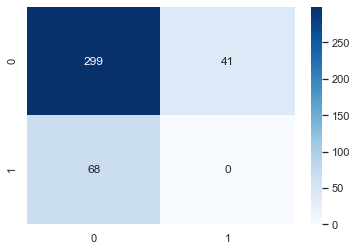

In [227]:
cm = confusion_matrix(testy1,yhat)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

In [228]:
svm_model = OneClassSVM(gamma='scale', nu=0.5)
svm_model.fit(trainX1)
# detect outliers in the test set
yhat = svm_model.predict(testX1)
# calculate score
score = f1_score(testy1, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.727


<AxesSubplot:>

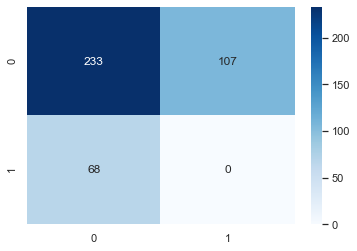

In [229]:
cm = confusion_matrix(testy1,yhat)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

In [181]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_1, Y_1 = rus.fit_resample(X1, Y1)
rus = RandomUnderSampler(random_state=42)
X_2, Y_2 = rus.fit_resample(X2, Y2)

ModuleNotFoundError: No module named 'imblearn'

#  <font color='red'>IV. Modélisation </font>

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf_train = RandomForestClassifier(n_estimators=1000)
clf_train.fit(X1, Y1)

RandomForestClassifier(n_estimators=1000)

In [27]:
filename = 'strealit_model.sav'
joblib.dump(clf_train, filename)

['strealit_model.sav']

In [28]:
loaded_rf = joblib.load('strealit_model.sav') 

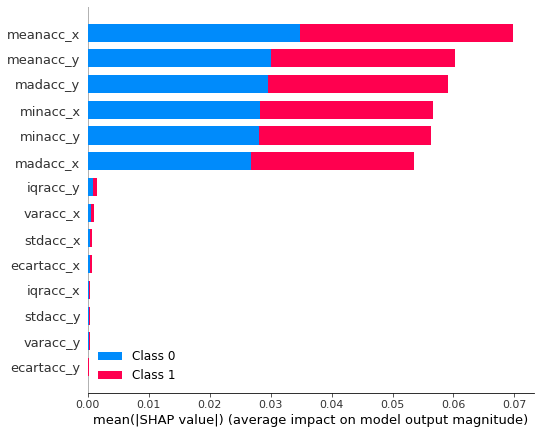

In [92]:
explainer = shap.TreeExplainer(loaded_rf)

# DF, based on which importance is checked
X_importance = X2

shap_values = explainer.shap_values(X_importance)
# Plot summary_plot
shap.summary_plot(shap_values, X_importance)

In [93]:
choosen_instance = X2.loc[[0]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

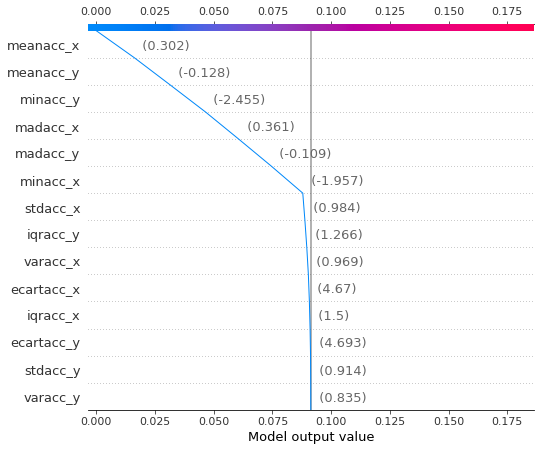

In [40]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

<AxesSubplot:>

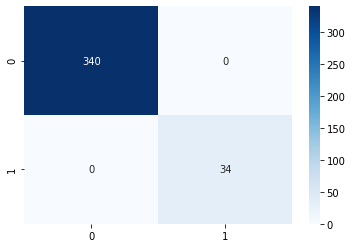

In [29]:
# load the model from disk
Y_test_pred = loaded_rf.predict(X2)
cm = confusion_matrix(Y2,Y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

0      0
1      0
2      0
3      0
4      0
      ..
363    1
364    1
365    1
366    1
367    1
Name: defaut, Length: 368, dtype: int64

In [74]:
X1[X1.index == int(1)]

,0,1,lable
1,4.199985,6.623287,0


In [74]:
comp="normal" if 1==0 else "anormal"
print(comp)

anormal


In [262]:
#loaded_rf = joblib.load("random_forest.joblib")
Y_test_pred = clf_train.predict(X3)
cm = confusion_matrix(Y3, Y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens')

C:\Users\adiaby\Anaconda3\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



ValueError: X has 14 features, but RandomForestClassifier is expecting 2 features as input.

<AxesSubplot:>

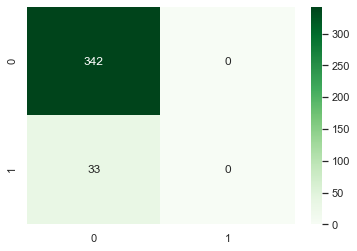

In [192]:
#loaded_rf = joblib.load("random_forest.joblib")
Y_test_pred = clf_train.predict(X4)
cm = confusion_matrix(Y4, Y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens')

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf_train = RandomForestClassifier(n_estimators=1000)
clf_train.fit(X_2, Y_2)

RandomForestClassifier(n_estimators=1000)

<AxesSubplot:>

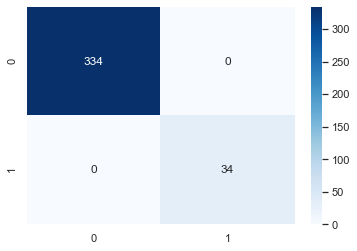

In [194]:
Y_test_pred = clf_train.predict(X1)
cm = confusion_matrix(Y1,Y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

<AxesSubplot:>

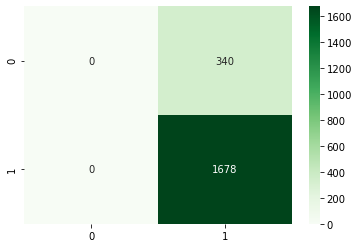

In [20]:
#loaded_rf = joblib.load("random_forest.joblib")
Y_test_pred = clf_train.predict(X3)
cm = confusion_matrix(Y3, Y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens')

<AxesSubplot:>

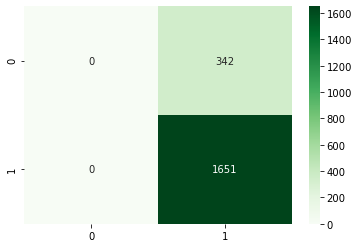

In [21]:
#loaded_rf = joblib.load("random_forest.joblib")
Y_test_pred = clf_train.predict(X4)
cm = confusion_matrix(Y4, Y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens')

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf_train = RandomForestClassifier(n_estimators=1000)
clf_train.fit(X_3, Y_3)

RandomForestClassifier(n_estimators=1000)

<AxesSubplot:>

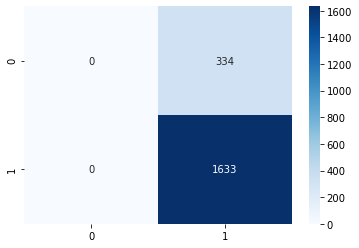

In [23]:
Y_test_pred = clf_train.predict(X1)
cm = confusion_matrix(Y1, Y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

<AxesSubplot:>

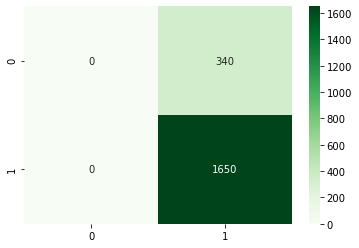

In [24]:
#loaded_rf = joblib.load("random_forest.joblib")
Y_test_pred = clf_train.predict(X2)
cm = confusion_matrix(Y2, Y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens')